# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: Gradient descent in 1D
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [3]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Gradient descent in 1D

In [4]:
# function (as a function)
def fx(x):
  return np.cos(2 * np.pi * x) + x ** 2

# derivative function
def deriv(x):
  return - (2 * np.pi) * (np.sin(2 * np.pi * x)) + 2 * x

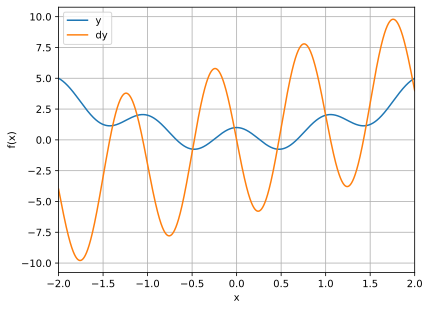

In [5]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

# Store the model parameters and outputs on each iteration

In [12]:
# random starting point
localmin = np.random.choice(x,1)[0]

# variant: starting value ist 0. Since grad is also 0, localmin never changes -> This is called "vanishing gradient"
# localmin = 0

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate * grad
  modelparams[i,0] = localmin
  modelparams[i,1] = grad

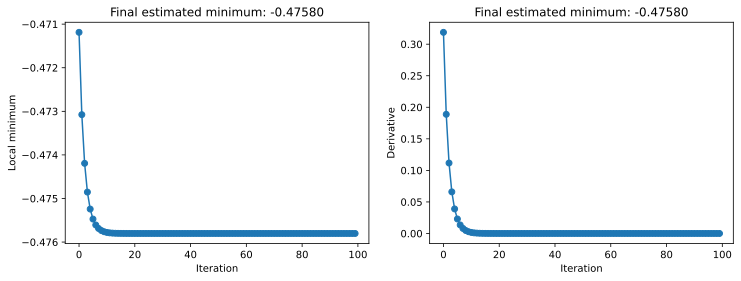

In [13]:
# plot the gradient over iterations
def plot_model(my_modelparams, upper_bound):
  fig,ax = plt.subplots(1,2,figsize=(12,4))
  for j in range(2):
    ax[j].plot(my_modelparams[:upper_bound,j],'o-')
    ax[j].set_xlabel('Iteration')
    ax[j].set_title(f'Final estimated minimum: {localmin:.5f}')

  ax[0].set_ylabel('Local minimum')
  ax[1].set_ylabel('Derivative')

  plt.show()

plot_model(modelparams, training_epochs)

# Code Challenge: unfortunate starting value

Number of iterations: 152


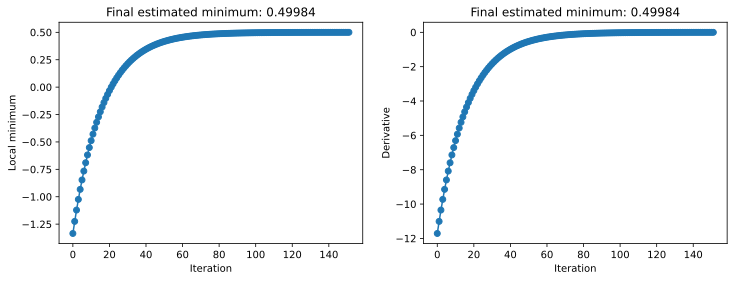

In [72]:
# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than 
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
# random starting point
localmin = np.random.choice(x,1)[0]
grad = deriv(localmin)

# learning parameters
learning_rate = .01

# run through training and store all the results
modelparams = []
i = 0
while abs(grad) > .001:
  localmin = localmin - learning_rate * grad
  modelparams.append([localmin, grad])
  # adjust values for next iteration
  grad = deriv(localmin)
  i += 1

print(f"Number of iterations: {i}")
plot_model(np.array(modelparams), i)

# 
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
#
#    -> Yes, see above
# 
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative 
#    instead of a specified number of training epochs?
#
#    -> Possibly, computing might go on ad infinitum, especially when a reasonable computation time is not known. In our case, the model-array would have to adapt
#    its size above 100 for small deltas (see above)